<a href="https://colab.research.google.com/github/telangvish1108/sales-analytics-system/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files
files.upload()

Saving sales_data.csv to sales_data.csv


{'sales_data.csv': b'TransactionID|Date|ProductID|ProductName|Quantity|UnitPrice|CustomerID|Region\r\nT018|2024-12-29|P107|USB Cable|8|173|C009|South\r\nT063|2024-12-07|P110|Laptop Charger|6|1916|C022|East\r\nT075|2024-12-10|P106|Headphones|0|2826|C001|South\r\nT023|2024-12-09|P109|Wireless Mouse|9|523|C022|North\r\nT059|2024-12-29|P102|MouseWireless|4|1056|C010|South\r\nT035|2024-12-08|P102|Mouse|4|431|C011|North\r\nT061|2024-12-10|P109|Wireless Mouse|2|775|C009|North\r\nT057|2024-12-15|P101|LaptopPremium|10|81896|C004|North\r\nT034|2024-12-22|P107|USB Cable|6|324|C029|West\r\nT050|2024-12-02|P104|MonitorLED|10|9997|C024|East\r\nT024|2024-12-25|P109|Wireless Mouse|5|1812|C011|North\r\nT004|2024-12-07|P109|Wireless Mouse|9|1359|C008|West\r\nT068|2024-12-02|P109|Wireless Mouse|6|1692|C018|South\r\nT066|2024-12-06|P105|Webcam|8|4259|C023|West\r\nT064|2024-12-16|P109|Wireless Mouse|5|604|C003|West\r\nT045|2024-12-26|P108|External Hard Drive|9|3802|C002|North\r\nT015|2024-12-30|P105|Webcam

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("sales_data.csv")

In [ ]:
print(df.head)

<bound method NDFrame.head of    TransactionID|Date|ProductID|ProductName|Quantity|UnitPrice|CustomerID|Region
0     T018|2024-12-29|P107|USB Cable|8|173|C009|South                           
1   T063|2024-12-07|P110|Laptop Charger|6|1916|C02...                           
2   T075|2024-12-10|P106|Headphones|0|2826|C001|South                           
3   T023|2024-12-09|P109|Wireless Mouse|9|523|C022...                           
4   T059|2024-12-29|P102|MouseWireless|4|1056|C010...                           
..                                                ...                           
75  T056|2024-12-22|P103|KeyboardMechanical|5|2672...                           
76  T047|2024-12-07|P108|External Hard Drive1TB|7|...                           
77  T026|2024-12-25|P109|Wireless Mouse|3|1539|C03...                           
78    T069|2024-12-05|P107|USB Cable|1|257|C012|North                           
79  T067|2024-12-01|P109|Wireless Mouse|2|654|C029...                          

In [ ]:
print(df.columns)

Index(['TransactionID|Date|ProductID|ProductName|Quantity|UnitPrice|CustomerID|Region'], dtype='object')


In [ ]:
print(df.columns.tolist())


['TransactionID|Date|ProductID|ProductName|Quantity|UnitPrice|CustomerID|Region']


In [ ]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
)


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df = df.rename(columns={'qty': 'quantity'})


In [ ]:
print("COLUMNS:", df.columns.tolist())


COLUMNS: ['transactionid|date|productid|productname|quantity|unitprice|customerid|region']


In [ ]:
df.head()


,transactionid|date|productid|productname|quantity|unitprice|customerid|region
0,T018|2024-12-29|P107|USB Cable|8|173|C009|South
1,T063|2024-12-07|P110|Laptop Charger|6|1916|C02...
2,T075|2024-12-10|P106|Headphones|0|2826|C001|South
3,T023|2024-12-09|P109|Wireless Mouse|9|523|C022...
4,T059|2024-12-29|P102|MouseWireless|4|1056|C010...


In [ ]:
df = pd.read_csv("sales_data.csv", sep="|")


In [ ]:
print(df.columns.tolist())


['TransactionID', 'Date', 'ProductID', 'ProductName', 'Quantity', 'UnitPrice', 'CustomerID', 'Region']


In [ ]:
df['UnitPrice']

,UnitPrice
0,173
1,1916
2,2826
3,523
4,1056
...,...
75,2672
76,3480
77,1539
78,257


In [ ]:
import pandas as pd

def load_and_clean_sales_data(file_path):
    df = pd.read_csv(file_path)

    df.drop_duplicates(inplace=True)

    df['Quantity'].fillna(1, inplace=True)
    df['UnitPrice'].fillna(df['UnitPrice'].median(), inplace=True)

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

    df['revenue'] = df['Quantity'] * df['UnitPrice']

    return df


In [ ]:
df = pd.read_csv("sales_data.csv", sep="|")

In [ ]:
print(df.columns.tolist())

['TransactionID', 'Date', 'ProductID', 'ProductName', 'Quantity', 'UnitPrice', 'CustomerID', 'Region']


In [ ]:
df['Quantity']

,Quantity
0,8
1,6
2,0
3,9
4,4
...,...
75,5
76,7
77,3
78,1


In [ ]:
print(load_and_clean_sales_data)


<function load_and_clean_sales_data at 0x7ec55ba56ca0>


In [ ]:
import pandas as pd

COLUMNS = [
    "transaction_id",
    "date",
    "product_id",
    "product_name",
    "quantity",
    "unit_price",
    "customer_id",
    "region"
]
sdata=pd.read_csv("sales_data.csv")
def load_and_clean_sales_data(sdata):
    df = pd.read_csv(
        "sales_data.csv",
        sep="|",
        header=None,
        names=COLUMNS
    )

    print("Detected columns:", df.columns.tolist())


    df = df.drop_duplicates()


    df['quantity'] = df['quantity'].fillna(1)
    df['unit_price'] = df['unit_price'].fillna(df['unit_price'].median())

    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    df = df[(df['quantity'] > 0) & (df['unit_price'] > 0)]

    df['product_id'] = df['product_id'].astype(str)
    df['customer_id'] = df['customer_id'].astype(str)

    df['revenue'] = df['quantity'] * df['unit_price']

    return df


In [ ]:
pd.to_numeric(..., errors="coerce")

Ellipsis

In [ ]:
import pandas as pd

COLUMNS = [
    "transaction_id",
    "date",
    "product_id",
    "product_name",
    "quantity",
    "unit_price",
    "customer_id",
    "region"
]

def load_and_clean_sales_data(df):
    df = pd.read_csv(
        "sales_data.csv",
        sep="|",
        header=None,
        names=COLUMNS
    )

    df.columns = df.columns.str.strip()

    print("Detected columns:", df.columns.tolist())

    df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
    df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')


    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

    df = df.dropna(subset=['quantity', 'unit_price','date'])

    df['quantity'] = df['quantity'].fillna(1)
    df['unit_price'] = df['unit_price'].fillna(df['unit_price'].median())

    df = df[(df['quantity'] > 0) & (df['unit_price'] > 0)]

    df['product_id'] = df['product_id'].astype(str)
    df['customer_id'] = df['customer_id'].astype(str)

    df = df.drop_duplicates()

    df['revenue'] = df['quantity'] * df['unit_price']

    return df


In [ ]:
sales_df = load_and_clean_sales_data("sales_data.csv")
sales_df.head()


Detected columns: ['transaction_id', 'date', 'product_id', 'product_name', 'quantity', 'unit_price', 'customer_id', 'region']


,transaction_id,date,product_id,product_name,quantity,unit_price,customer_id,region,revenue
1,T018,2024-12-29,P107,USB Cable,8.0,173.0,C009,South,1384.0
2,T063,2024-12-07,P110,Laptop Charger,6.0,1916.0,C022,East,11496.0
4,T023,2024-12-09,P109,Wireless Mouse,9.0,523.0,C022,North,4707.0
5,T059,2024-12-29,P102,MouseWireless,4.0,1056.0,C010,South,4224.0
6,T035,2024-12-08,P102,Mouse,4.0,431.0,C011,North,1724.0


In [ ]:
API_URL = "https://fakestoreapi.com/products"

def fetch_product_data():
    response = requests.get(API_URL)
    product_df.rename(columns={'ProductID': 'product_id'}, inplace=True)

    if response.status_code == 200:
        products = response.json()
        product_df = pd.DataFrame(products)
        return product_df[['id', 'title', 'category', 'price']]
    else:
        raise Exception("API request failed")


In [ ]:
def merge_sales_product_data(sales_df, product_df):
    product_df['product_id'] = product_df['product_id'].astype(str)

    merged_df = pd.merge(
        sales_df,
        product_df,
        left_on='product_id',
        right_on='product_id',
        how='left'
    )

    return merged_df



In [ ]:
def top_selling_products(df):
    return df.groupby('title')['revenue'].sum().sort_values(ascending=False).head(10)


In [ ]:
def monthly_sales_trend(df):
    df['month'] = df['order_date'].dt.to_period('M')
    return df.groupby('month')['revenue'].sum()


In [ ]:
def customer_analysis(df):
    customer_summary = df.groupby('customer_id').agg({
        'order_id': 'count',
        'revenue': 'sum'
    }).rename(columns={
        'order_id': 'total_orders',
        'revenue': 'total_spent'
    })
    return customer_summary


In [ ]:
def plot_sales_trend(monthly_sales):
    monthly_sales.plot(kind='line', title='Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()


In [ ]:
def generate_report(df, top_products, customer_data):
    with pd.ExcelWriter("sales_report.xlsx", engine='xlsxwriter') as writer:
        df.to_excel(writer, sheet_name='Cleaned Data', index=False)
        top_products.to_excel(writer, sheet_name='Top Products')
        customer_data.to_excel(writer, sheet_name='Customer Summary')


In [ ]:
def load_and_clean_sales_data(sdata):
    import pandas as pd

    df = pd.read_csv("sales_data.csv")

    print("Columns in CSV:", df.columns.tolist())

    df.columns = df.columns.str.strip()

    return df

In [ ]:
sales_df = load_and_clean_sales_data("sales_data.csv")


Columns in CSV: ['TransactionID|Date|ProductID|ProductName|Quantity|UnitPrice|CustomerID|Region']


In [ ]:
!pip install XlsxWriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 13.3 MB/s eta 0:00:00


Detected columns: ['transaction_id', 'date', 'product_id', 'product_name', 'quantity', 'unit_price', 'customer_id', 'region']
  transaction_id       date product_id    product_name  quantity  unit_price  \
1           T018 2024-12-29       P107       USB Cable       8.0       173.0   
2           T063 2024-12-07       P110  Laptop Charger       6.0      1916.0   
4           T023 2024-12-09       P109  Wireless Mouse       9.0       523.0   
5           T059 2024-12-29       P102   MouseWireless       4.0      1056.0   
6           T035 2024-12-08       P102           Mouse       4.0       431.0   

  customer_id region  revenue  
1        C009  South   1384.0  
2        C022   East  11496.0  
4        C022  North   4707.0  
5        C010  South   4224.0  
6        C011  North   1724.0  
["'transaction_id'", "'date'", "'product_id'", "'product_name'", "'quantity'", "'unit_price'", "'customer_id'", "'region'", "'revenue'"]
Sales data loaded successfully
Detected product columns: ['produ

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


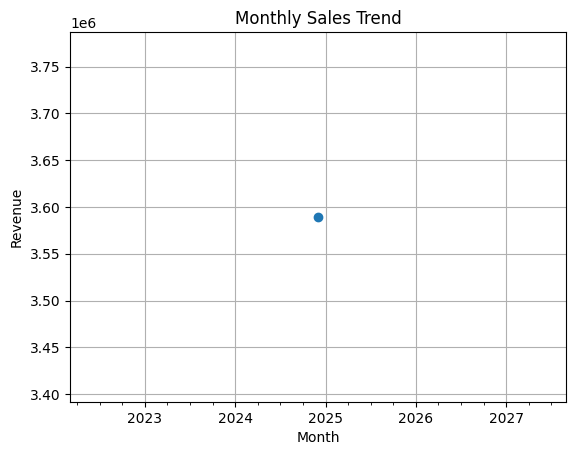

 Business Report Generated Successfully!


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

COLUMNS = [
    "transaction_id",
    "date",
    "product_id",
    "product_name",
    "quantity",
    "unit_price",
    "customer_id",
    "region"
]

def load_and_clean_sales_data(df):
    df = pd.read_csv(
        "sales_data.csv",
        sep="|",
        header=None,
        names=COLUMNS
    )


    df.columns = df.columns.str.strip()
    print("Detected columns:", df.columns.tolist())


    df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
    df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')


    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')


    df = df.dropna(subset=['quantity', 'unit_price','date'])


    df['quantity'] = df['quantity'].fillna(1)
    df['unit_price'] = df['unit_price'].fillna(df['unit_price'].median())


    df = df[(df['quantity'] > 0) & (df['unit_price'] > 0)]


    df['product_id'] = df['product_id'].astype(str)
    df['customer_id'] = df['customer_id'].astype(str)


    df = df.drop_duplicates()

    df['revenue'] = df['quantity'] * df['unit_price']

    return df


API_URL = "https://fakestoreapi.com/products"

def fetch_product_data():
    response = requests.get(API_URL)
    if response.status_code == 200:
        products = response.json()
        product_df = pd.DataFrame(products)
        product_df.rename(columns={'id': 'product_id', 'title': 'product_name'}, inplace=True)
        product_df['product_id'] = product_df['product_id'].astype(str)
        return product_df[['product_id', 'product_name', 'category', 'price']]
    else:
        raise Exception("API request failed")


def merge_sales_product_data(sales_df, product_df):
    merged_df = pd.merge(
        sales_df,
        product_df,
        on='product_id',
        how='left',
        suffixes=('_sales', '_api')
    )
    if 'product_name_sales' in merged_df.columns:
        merged_df['product_name'] = merged_df['product_name_sales']
        merged_df.drop(['product_name_sales', 'product_name_api'], axis=1, inplace=True, errors='ignore')

    return merged_df


def top_selling_products(df):
    if 'product_name' not in df.columns:
        raise KeyError("Column 'product_name' not found in DataFrame")
    return df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

def monthly_sales_trend(df):
    df['month'] = df['date'].dt.to_period('M')
    return df.groupby('month')['revenue'].sum()

def customer_analysis(df):
    customer_summary = df.groupby('customer_id').agg({
        'transaction_id': 'count',
        'revenue': 'sum'
    }).rename(columns={
        'transaction_id': 'total_orders',
        'revenue': 'total_spent'
    })
    return customer_summary



def plot_sales_trend(monthly_sales):
    monthly_sales.plot(kind='line', title='Monthly Sales Trend', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()


def generate_report(df, top_products, customer_data):
    with pd.ExcelWriter("sales_report.xlsx", engine='xlsxwriter') as writer:
        df.to_excel(writer, sheet_name='Cleaned Data', index=False)
        top_products.to_excel(writer, sheet_name='Top Products')
        customer_data.to_excel(writer, sheet_name='Customer Summary')


def main():
    sales_df = load_and_clean_sales_data("sales_data.csv")
    print(sales_df.head())
    print([f"'{c}'" for c in sales_df.columns])
    print("Sales data loaded successfully")

    product_df = fetch_product_data()
    print("Detected product columns:", product_df.columns.tolist())

    full_data = merge_sales_product_data(sales_df, product_df)

    top_products = top_selling_products(full_data)
    monthly_sales = monthly_sales_trend(full_data)
    customer_data = customer_analysis(full_data)

    plot_sales_trend(monthly_sales)
    generate_report(full_data, top_products, customer_data)
    print(" Business Report Generated Successfully!")

if __name__ == "__main__":
    main()


In [ ]:
def read_sales_data(df):

    encodings = ['utf-8', 'latin-1', 'cp1252']

    for encoding in encodings:
        try:
            with open(df, 'r', encoding=encoding) as file:
                lines = file.readlines()

                data_lines = [
                    line.strip()
                    for line in lines[1:]
                    if line.strip()
                ]

                return data_lines

        except UnicodeDecodeError:

            continue

        except FileNotFoundError:
            print(f"Error: File '{df}' not found.")
            return []


    print("Error: Unable to read file with supported encodings.")
    return []


In [ ]:
!mkdir utils
!touch utils/__init__.py


In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
!mkdir -p utils
!touch utils/__init__.py



In [ ]:
%%writefile utils/file_handler.py
def read_sales_data(df):
    encodings = ['utf-8', 'latin-1', 'cp1252']

    for encoding in encodings:
        try:
            with open(df, 'r', encoding=encoding) as file:
                lines = file.readlines()
                return [line.strip() for line in lines[1:] if line.strip()]
        except UnicodeDecodeError:
            continue
        except FileNotFoundError:
            print(f"Error: File '{df}' not found.")
            return []

    print("Error: Unable to read file with supported encodings.")
    return []


Writing utils/file_handler.py


In [ ]:
from utils.file_handler import read_sales_data

read_sales_data("sales_data.txt")


Error: File 'sales_data.txt' not found.


[]

In [ ]:
data = read_sales_data("sales_data.txt")
print(data)


Error: File 'sales_data.txt' not found.
[]


In [ ]:
%%writefile sales_data.txt
transaction_id|date|product_id|product_name|quantity|unit_price|customer_id|region
T001|2024-12-01|P101|Laptop|2|45000|C001|North
T002|2024-12-02|P102|Mouse|1|500|C002|South
T003|2024-12-03|P103|Keyboard|3|1500|C003|East



Writing sales_data.txt


In [ ]:
from utils.file_handler import read_sales_data

data = read_sales_data("sales_data.txt")
print(data)


['T001|2024-12-01|P101|Laptop|2|45000|C001|North', 'T002|2024-12-02|P102|Mouse|1|500|C002|South', 'T003|2024-12-03|P103|Keyboard|3|1500|C003|East']


In [ ]:
read_sales_data("sales_data.txt")


['T001|2024-12-01|P101|Laptop|2|45000|C001|North',
 'T002|2024-12-02|P102|Mouse|1|500|C002|South',
 'T003|2024-12-03|P103|Keyboard|3|1500|C003|East']

In [ ]:
!ls


sales_data.csv	sales_data.txt	sales_report.xlsx  sample_data	utils


In [ ]:
from utils.file_handler import read_sales_data

data = read_sales_data("sales_data.txt")
print(data)


['T001|2024-12-01|P101|Laptop|2|45000|C001|North', 'T002|2024-12-02|P102|Mouse|1|500|C002|South', 'T003|2024-12-03|P103|Keyboard|3|1500|C003|East']


In [ ]:
def parse_transactions(raw_lines):

    transactions = []

    for line in raw_lines:

        parts = line.split('|')


        if len(parts) != 8:
            continue

        try:
            transaction_id = parts[0].strip()
            date = parts[1].strip()
            product_id = parts[2].strip()


            product_name = parts[3].replace(',', '').strip()


            quantity = int(parts[4].replace(',', '').strip())
            unit_price = float(parts[5].replace(',', '').strip())

            customer_id = parts[6].strip()
            region = parts[7].strip()

            transactions.append({
                'TransactionID': transaction_id,
                'Date': date,
                'ProductID': product_id,
                'ProductName': product_name,
                'Quantity': quantity,
                'UnitPrice': unit_price,
                'CustomerID': customer_id,
                'Region': region
            })

        except ValueError:

            continue

    return transactions


In [ ]:
%%writefile utils/data_parser.py
def parse_transactions(raw_lines):


    transactions = []

    for line in raw_lines:
        parts = line.split('|')


        if len(parts) != 8:
            continue

        try:
            transaction_id = parts[0].strip()
            date = parts[1].strip()
            product_id = parts[2].strip()


            product_name = parts[3].replace(',', '').strip()

            quantity = int(parts[4].replace(',', '').strip())
            unit_price = float(parts[5].replace(',', '').strip())

            customer_id = parts[6].strip()
            region = parts[7].strip()

            transactions.append({
                'TransactionID': transaction_id,
                'Date': date,
                'ProductID': product_id,
                'ProductName': product_name,
                'Quantity': quantity,
                'UnitPrice': unit_price,
                'CustomerID': customer_id,
                'Region': region
            })

        except ValueError:
            continue

    return transactions


Writing utils/data_parser.py


In [ ]:
!ls utils

data_parser.py	file_handler.py  __init__.py  __pycache__


In [ ]:
from utils.file_handler import read_sales_data
from utils.data_parser import parse_transactions

raw_data = read_sales_data("sales_data.txt")
clean_data = parse_transactions(raw_data)

print(clean_data)


[{'TransactionID': 'T001', 'Date': '2024-12-01', 'ProductID': 'P101', 'ProductName': 'Laptop', 'Quantity': 2, 'UnitPrice': 45000.0, 'CustomerID': 'C001', 'Region': 'North'}, {'TransactionID': 'T002', 'Date': '2024-12-02', 'ProductID': 'P102', 'ProductName': 'Mouse', 'Quantity': 1, 'UnitPrice': 500.0, 'CustomerID': 'C002', 'Region': 'South'}, {'TransactionID': 'T003', 'Date': '2024-12-03', 'ProductID': 'P103', 'ProductName': 'Keyboard', 'Quantity': 3, 'UnitPrice': 1500.0, 'CustomerID': 'C003', 'Region': 'East'}]


In [ ]:
def validate_and_filter(transactions, region=None, min_amount=None, max_amount=None):


    required_fields = {
        'TransactionID', 'Date', 'ProductID', 'ProductName',
        'Quantity', 'UnitPrice', 'CustomerID', 'Region'
    }

    total_input = len(transactions)
    invalid_count = 0
    valid_transactions = []


    for tx in transactions:
        try:

            if not required_fields.issubset(tx.keys()):
                invalid_count += 1
                continue


            if tx['Quantity'] <= 0 or tx['UnitPrice'] <= 0:
                invalid_count += 1
                continue

            if not tx['TransactionID'].startswith('T'):
                invalid_count += 1
                continue

            if not tx['ProductID'].startswith('P'):
                invalid_count += 1
                continue

            if not tx['CustomerID'].startswith('C'):
                invalid_count += 1
                continue

            valid_transactions.append(tx)

        except Exception:
            invalid_count += 1


    regions = sorted({tx['Region'] for tx in valid_transactions})
    amounts = [tx['Quantity'] * tx['UnitPrice'] for tx in valid_transactions]

    print("Available Regions:", regions)
    if amounts:
        print(f"Transaction Amount Range: {min(amounts)} - {max(amounts)}")

    filtered_by_region = 0
    filtered_by_amount = 0

    filtered = valid_transactions


    if region:
        before = len(filtered)
        filtered = [tx for tx in filtered if tx['Region'] == region]
        filtered_by_region = before - len(filtered)
        print(f"After region filter ({region}): {len(filtered)} records")

    if min_amount is not None or max_amount is not None:
        before = len(filtered)
        temp = []

        for tx in filtered:
            amount = tx['Quantity'] * tx['UnitPrice']

            if min_amount is not None and amount < min_amount:
                continue
            if max_amount is not None and amount > max_amount:
                continue

            temp.append(tx)

        filtered = temp
        filtered_by_amount = before - len(filtered)
        print(f"After amount filter: {len(filtered)} records")


    summary = {
        'total_input': total_input,
        'invalid': invalid_count,
        'filtered_by_region': filtered_by_region,
        'filtered_by_amount': filtered_by_amount,
        'final_count': len(filtered)
    }

    return filtered, invalid_count, summary


In [ ]:
%%writefile utils/data_validator.py
def validate_and_filter(transactions, region=None, min_amount=None, max_amount=None):


    required_fields = {
        'TransactionID', 'Date', 'ProductID', 'ProductName',
        'Quantity', 'UnitPrice', 'CustomerID', 'Region'
    }

    total_input = len(transactions)
    invalid_count = 0
    valid_transactions = []

    for tx in transactions:
        try:
            if not required_fields.issubset(tx.keys()):
                invalid_count += 1
                continue

            if tx['Quantity'] <= 0 or tx['UnitPrice'] <= 0:
                invalid_count += 1
                continue

            if not tx['TransactionID'].startswith('T'):
                invalid_count += 1
                continue

            if not tx['ProductID'].startswith('P'):
                invalid_count += 1
                continue

            if not tx['CustomerID'].startswith('C'):
                invalid_count += 1
                continue

            valid_transactions.append(tx)

        except Exception:
            invalid_count += 1

    regions = sorted({tx['Region'] for tx in valid_transactions})
    amounts = [tx['Quantity'] * tx['UnitPrice'] for tx in valid_transactions]

    print("Available Regions:", regions)
    if amounts:
        print(f"Transaction Amount Range: {min(amounts)} - {max(amounts)}")

    filtered = valid_transactions
    filtered_by_region = 0
    filtered_by_amount = 0

    if region:
        before = len(filtered)
        filtered = [tx for tx in filtered if tx['Region'] == region]
        filtered_by_region = before - len(filtered)
        print(f"After region filter ({region}): {len(filtered)} records")

    if min_amount is not None or max_amount is not None:
        before = len(filtered)
        temp = []

        for tx in filtered:
            amount = tx['Quantity'] * tx['UnitPrice']

            if min_amount is not None and amount < min_amount:
                continue
            if max_amount is not None and amount > max_amount:
                continue

            temp.append(tx)

        filtered = temp
        filtered_by_amount = before - len(filtered)
        print(f"After amount filter: {len(filtered)} records")

    summary = {
        'total_input': total_input,
        'invalid': invalid_count,
        'filtered_by_region': filtered_by_region,
        'filtered_by_amount': filtered_by_amount,
        'final_count': len(filtered)
    }

    return filtered, invalid_count, summary


Writing utils/data_validator.py


In [ ]:
!ls utils


data_parser.py	data_validator.py  file_handler.py  __init__.py  __pycache__


In [ ]:
from utils.file_handler import read_sales_data
from utils.data_parser import parse_transactions
from utils.data_validator import validate_and_filter

raw = read_sales_data("sales_data.txt")
clean = parse_transactions(raw)

valid, invalid_count, summary = validate_and_filter(
    clean,
    region="North",
    min_amount=1000,
    max_amount=100000
)

print(valid)
print(invalid_count)
print(summary)


Available Regions: ['East', 'North', 'South']
Transaction Amount Range: 500.0 - 90000.0
After region filter (North): 1 records
After amount filter: 1 records
[{'TransactionID': 'T001', 'Date': '2024-12-01', 'ProductID': 'P101', 'ProductName': 'Laptop', 'Quantity': 2, 'UnitPrice': 45000.0, 'CustomerID': 'C001', 'Region': 'North'}]
0
{'total_input': 3, 'invalid': 0, 'filtered_by_region': 2, 'filtered_by_amount': 0, 'final_count': 1}


Part 2: DATA Processing (lists,Dictionaries & function)

In [ ]:
def calculate_total_revenue(transactions):


    total_revenue = 0.0

    for tx in transactions:
        total_revenue += tx['Quantity'] * tx['UnitPrice']

    return total_revenue


In [ ]:
%%writefile utils/data_processor.py
def calculate_total_revenue(transactions):


    total_revenue = 0.0

    for tx in transactions:
        total_revenue += tx['Quantity'] * tx['UnitPrice']

    return total_revenue


Writing utils/data_processor.py


In [ ]:
!ls utils


data_parser.py	   data_validator.py  __init__.py
data_processor.py  file_handler.py    __pycache__


In [ ]:
from utils.data_processor import calculate_total_revenue

total = calculate_total_revenue(valid)
print(total)


90000.0


Region wise sales Analysis

In [ ]:
def region_wise_sales(transactions):


    region_data = {}
    total_sales_all = 0.0

    for tx in transactions:
        region = tx['Region']
        sales = tx['Quantity'] * tx['UnitPrice']

        total_sales_all += sales

        if region not in region_data:
            region_data[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_data[region]['total_sales'] += sales
        region_data[region]['transaction_count'] += 1

    for region in region_data:
        region_total = region_data[region]['total_sales']
        percentage = (region_total / total_sales_all) * 100 if total_sales_all > 0 else 0
        region_data[region]['percentage'] = round(percentage, 2)

    sorted_region_data = dict(
        sorted(
            region_data.items(),
            key=lambda item: item[1]['total_sales'],
            reverse=True
        )
    )

    return sorted_region_data


In [ ]:
%%writefile utils/data_processor.py
def calculate_total_revenue(transactions):

    total_revenue = 0.0
    for tx in transactions:
        total_revenue += tx['Quantity'] * tx['UnitPrice']
    return total_revenue


def region_wise_sales(transactions):


    region_data = {}
    total_sales_all = 0.0

    # Calculate totals
    for tx in transactions:
        region = tx['Region']
        sales = tx['Quantity'] * tx['UnitPrice']

        total_sales_all += sales

        if region not in region_data:
            region_data[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_data[region]['total_sales'] += sales
        region_data[region]['transaction_count'] += 1

    for region in region_data:
        percent = (region_data[region]['total_sales'] / total_sales_all) * 100 if total_sales_all else 0
        region_data[region]['percentage'] = round(percent, 2)


    sorted_region_data = dict(
        sorted(
            region_data.items(),
            key=lambda x: x[1]['total_sales'],
            reverse=True
        )
    )

    return sorted_region_data


Overwriting utils/data_processor.py


In [ ]:
!cat utils/data_processor.py


def calculate_total_revenue(transactions):

    total_revenue = 0.0
    for tx in transactions:
        total_revenue += tx['Quantity'] * tx['UnitPrice']
    return total_revenue


def region_wise_sales(transactions):


    region_data = {}
    total_sales_all = 0.0

    # Calculate totals
    for tx in transactions:
        region = tx['Region']
        sales = tx['Quantity'] * tx['UnitPrice']

        total_sales_all += sales

        if region not in region_data:
            region_data[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_data[region]['total_sales'] += sales
        region_data[region]['transaction_count'] += 1

    for region in region_data:
        percent = (region_data[region]['total_sales'] / total_sales_all) * 100 if total_sales_all else 0
        region_data[region]['percentage'] = round(percent, 2)


    sorted_region_data = dict(
        sorted(
            region_data.items(),
            key=

In [ ]:
%%writefile utils/data_processor.py
def calculate_total_revenue(transactions):

    total_revenue = 0.0
    for tx in transactions:
        total_revenue += tx['Quantity'] * tx['UnitPrice']
    return total_revenue


def region_wise_sales(transactions):

    region_summary = {}
    overall_total = 0.0

    for tx in transactions:
        region = tx['Region']
        sales = tx['Quantity'] * tx['UnitPrice']
        overall_total += sales

        if region not in region_summary:
            region_summary[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_summary[region]['total_sales'] += sales
        region_summary[region]['transaction_count'] += 1

    for region in region_summary:
        region_summary[region]['percentage'] = round(
            (region_summary[region]['total_sales'] / overall_total) * 100, 2
        )

    return dict(
        sorted(
            region_summary.items(),
            key=lambda x: x[1]['total_sales'],
            reverse=True
        )
    )


Overwriting utils/data_processor.py


In [ ]:
!touch utils/__init__.py


In [ ]:
import importlib
import utils.data_processor
importlib.reload(utils.data_processor)
from utils.data_processor import calculate_total_revenue, region_wise_sales

print("Total Revenue:", calculate_total_revenue(valid))
print("Region Summary:", region_wise_sales(valid))

Total Revenue: 90000.0
Region Summary: {'North': {'total_sales': 90000.0, 'transaction_count': 1, 'percentage': 100.0}}


In [ ]:
import utils.data_processor as dp
print(dir(dp))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calculate_total_revenue', 'region_wise_sales']


In [ ]:
!cat utils/data_processor.py


def calculate_total_revenue(transactions):

    total_revenue = 0.0
    for tx in transactions:
        total_revenue += tx['Quantity'] * tx['UnitPrice']
    return total_revenue


def region_wise_sales(transactions):

    region_summary = {}
    overall_total = 0.0

    for tx in transactions:
        region = tx['Region']
        sales = tx['Quantity'] * tx['UnitPrice']
        overall_total += sales

        if region not in region_summary:
            region_summary[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_summary[region]['total_sales'] += sales
        region_summary[region]['transaction_count'] += 1

    for region in region_summary:
        region_summary[region]['percentage'] = round(
            (region_summary[region]['total_sales'] / overall_total) * 100, 2
        )

    return dict(
        sorted(
            region_summary.items(),
            key=lambda x: x[1]['total_sales'],
            revers

In [ ]:
%%writefile utils/data_processor.py
def calculate_total_revenue(transactions):

    total = 0.0
    for t in transactions:
        total += t['Quantity'] * t['UnitPrice']
    return total


def region_wise_sales(transactions):
    """
    Analyzes sales by region
    """
    region_data = {}
    grand_total = 0.0

    for t in transactions:
        region = t['Region']
        sales = t['Quantity'] * t['UnitPrice']
        grand_total += sales

        if region not in region_data:
            region_data[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_data[region]['total_sales'] += sales
        region_data[region]['transaction_count'] += 1

    for region in region_data:
        region_data[region]['percentage'] = round(
            (region_data[region]['total_sales'] / grand_total) * 100, 2
        )

    return dict(
        sorted(
            region_data.items(),
            key=lambda x: x[1]['total_sales'],
            reverse=True
        )
    )


Overwriting utils/data_processor.py


In [ ]:
from utils.data_processor import calculate_total_revenue, region_wise_sales

print("Total Revenue:", calculate_total_revenue(valid))
print("Region Summary:", region_wise_sales(valid))


Total Revenue: 90000.0
Region Summary: {'North': {'total_sales': 90000.0, 'transaction_count': 1, 'percentage': 100.0}}


In [ ]:
import utils.data_processor as dp
print(dir(dp))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calculate_total_revenue', 'region_wise_sales']


In [ ]:
from pprint import pprint

pprint(region_wise_sales(valid))


{'North': {'percentage': 100.0, 'total_sales': 90000.0, 'transaction_count': 1}}


In [ ]:
summary = region_wise_sales(valid)
for region, stats in summary.items():
    print(region)
    print(stats)

North
{'total_sales': 90000.0, 'transaction_count': 1, 'percentage': 100.0}


Customers Purchase Analysis


In [ ]:
def customer_analysis(transactions):


    customer_stats = {}

    for tx in transactions:
        customer_id = tx['CustomerID']
        amount = tx['Quantity'] * tx['UnitPrice']
        product = tx['ProductName']

        if customer_id not in customer_stats:
            customer_stats[customer_id] = {
                'total_spent': 0.0,
                'purchase_count': 0,
                'products': set()
            }

        customer_stats[customer_id]['total_spent'] += amount
        customer_stats[customer_id]['purchase_count'] += 1
        customer_stats[customer_id]['products'].add(product)

    final_result = {}

    for customer_id, data in customer_stats.items():
        avg_order_value = round(
            data['total_spent'] / data['purchase_count'], 2
        )

        final_result[customer_id] = {
            'total_spent': round(data['total_spent'], 2),
            'purchase_count': data['purchase_count'],
            'avg_order_value': avg_order_value,
            'products_bought': sorted(list(data['products']))
        }

    final_result = dict(
        sorted(
            final_result.items(),
            key=lambda x: x[1]['total_spent'],
            reverse=True
        )
    )

    return final_result


In [ ]:
def top_selling_products(transactions, n=5):
    product_summary = {}

    for tx in transactions:
        product = tx['ProductName']
        qty = tx['Quantity']
        revenue = tx['Quantity'] * tx['UnitPrice']

        if product not in product_summary:
            product_summary[product] = {
                'total_quantity': 0,
                'total_revenue': 0.0
            }

        product_summary[product]['total_quantity'] += qty
        product_summary[product]['total_revenue'] += revenue


    result = []
    for product, data in product_summary.items():
        result.append(
            (product,
             data['total_quantity'],
             round(data['total_revenue'], 2))
        )

    result.sort(key=lambda x: x[1], reverse=True)

    return result[:n]


In [ ]:
import sys
sys.modules.pop('utils.data_processor', None)


<module 'utils.data_processor' from '/content/utils/data_processor.py'>

In [ ]:
!cat utils/data_processor.py


def calculate_total_revenue(transactions):

    total = 0.0
    for t in transactions:
        total += t['Quantity'] * t['UnitPrice']
    return total


def region_wise_sales(transactions):
    """
    Analyzes sales by region
    """
    region_data = {}
    grand_total = 0.0

    for t in transactions:
        region = t['Region']
        sales = t['Quantity'] * t['UnitPrice']
        grand_total += sales

        if region not in region_data:
            region_data[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_data[region]['total_sales'] += sales
        region_data[region]['transaction_count'] += 1

    for region in region_data:
        region_data[region]['percentage'] = round(
            (region_data[region]['total_sales'] / grand_total) * 100, 2
        )

    return dict(
        sorted(
            region_data.items(),
            key=lambda x: x[1]['total_sales'],
            reverse=True
        )
   

In [ ]:
%%writefile utils/data_processor.py

def calculate_total_revenue(transactions):
    total = 0.0
    for tx in transactions:
        total += tx['Quantity'] * tx['UnitPrice']
    return round(total, 2)


def region_wise_sales(transactions):
    region_data = {}
    total_revenue = calculate_total_revenue(transactions)

    for tx in transactions:
        region = tx['Region']
        amount = tx['Quantity'] * tx['UnitPrice']

        if region not in region_data:
            region_data[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_data[region]['total_sales'] += amount
        region_data[region]['transaction_count'] += 1

    result = {}
    for region, data in region_data.items():
        percentage = (data['total_sales'] / total_revenue) * 100 if total_revenue else 0
        result[region] = {
            'total_sales': round(data['total_sales'], 2),
            'transaction_count': data['transaction_count'],
            'percentage': round(percentage, 2)
        }

    return dict(sorted(result.items(),
                       key=lambda x: x[1]['total_sales'],
                       reverse=True))


def customer_analysis(transactions):
    customer_stats = {}

    for tx in transactions:
        cid = tx['CustomerID']
        amount = tx['Quantity'] * tx['UnitPrice']
        product = tx['ProductName']

        if cid not in customer_stats:
            customer_stats[cid] = {
                'total_spent': 0.0,
                'purchase_count': 0,
                'products': set()
            }

        customer_stats[cid]['total_spent'] += amount
        customer_stats[cid]['purchase_count'] += 1
        customer_stats[cid]['products'].add(product)

    result = {}
    for cid, data in customer_stats.items():
        result[cid] = {
            'total_spent': round(data['total_spent'], 2),
            'purchase_count': data['purchase_count'],
            'avg_order_value': round(
                data['total_spent'] / data['purchase_count'], 2
            ),
            'products_bought': sorted(list(data['products']))
        }

    return dict(sorted(result.items(),
                       key=lambda x: x[1]['total_spent'],
                       reverse=True))


Overwriting utils/data_processor.py


In [ ]:
import sys
sys.modules.pop('utils.data_processor', None)


In [ ]:
import utils.data_processor
print(utils.data_processor.__file__)


/content/utils/data_processor.py


In [ ]:
!sed -n '1,300p' /content/utils/data_processor.py



def calculate_total_revenue(transactions):
    total = 0.0
    for tx in transactions:
        total += tx['Quantity'] * tx['UnitPrice']
    return round(total, 2)


def region_wise_sales(transactions):
    region_data = {}
    total_revenue = calculate_total_revenue(transactions)

    for tx in transactions:
        region = tx['Region']
        amount = tx['Quantity'] * tx['UnitPrice']

        if region not in region_data:
            region_data[region] = {
                'total_sales': 0.0,
                'transaction_count': 0
            }

        region_data[region]['total_sales'] += amount
        region_data[region]['transaction_count'] += 1

    result = {}
    for region, data in region_data.items():
        percentage = (data['total_sales'] / total_revenue) * 100 if total_revenue else 0
        result[region] = {
            'total_sales': round(data['total_sales'], 2),
            'transaction_count': data['transaction_count'],
            'percentage': round(percenta

In [ ]:
%%writefile -a utils/data_processor.py

def top_selling_products(transactions, n=5):
    product_summary = {}

    for tx in transactions:
        product = tx['ProductName']
        qty = tx['Quantity']
        revenue = tx['Quantity'] * tx['UnitPrice']

        if product not in product_summary:
            product_summary[product] = {
                'total_quantity': 0,
                'total_revenue': 0.0
            }

        product_summary[product]['total_quantity'] += qty
        product_summary[product]['total_revenue'] += revenue

    result = []
    for product, data in product_summary.items():
        result.append(
            (product,
             data['total_quantity'],
             round(data['total_revenue'], 2))
        )

    result.sort(key=lambda x: x[1], reverse=True)
    return result[:n]


Appending to utils/data_processor.py


In [ ]:
import sys
sys.modules.pop('utils.data_processor', None)


<module 'utils.data_processor' from '/content/utils/data_processor.py'>

In [ ]:
from utils.data_processor import top_selling_products
from pprint import pprint

pprint(top_selling_products(valid))


[('Laptop', 2, 90000.0)]


TASK  2.2 DATE BASED ANALYSIS **(A**)

In [ ]:
def daily_sales_trend(transactions):

    daily_data = {}

    for tx in transactions:
        date = tx['date']
        revenue = tx['revenue']
        customer = tx['customer_id']

        if date not in daily_data:
            daily_data[date] = {
                'revenue': 0.0,
                'transaction_count': 0,
                'unique_customers': set()
            }

        daily_data[date]['revenue'] += revenue
        daily_data[date]['transaction_count'] += 1
        daily_data[date]['unique_customers'].add(customer)

    for date in daily_data:
        daily_data[date]['unique_customers'] = len(daily_data[date]['unique_customers'])

    return dict(sorted(daily_data.items()))


In [ ]:
def find_peak_sales_day(transactions):

    daily_summary = {}

    for tx in transactions:
        date = tx['date']
        revenue = tx['revenue']

        if date not in daily_summary:
            daily_summary[date] = {
                'revenue': 0.0,
                'transaction_count': 0
            }

        daily_summary[date]['revenue'] += revenue
        daily_summary[date]['transaction_count'] += 1

    peak_date = max(
        daily_summary,
        key=lambda d: daily_summary[d]['revenue']
    )

    return (
        peak_date,
        daily_summary[peak_date]['revenue'],
        daily_summary[peak_date]['transaction_count']
    )


In [ ]:
transactions = [
    {'date': '2024-12-01', 'revenue': 25000.0, 'customer_id': 'C1'},
    {'date': '2024-12-01', 'revenue': 30000.0, 'customer_id': 'C2'},
    {'date': '2024-12-02', 'revenue': 40000.0, 'customer_id': 'C1'},
    {'date': '2024-12-02', 'revenue': 35000.0, 'customer_id': 'C3'},
    {'date': '2024-12-15', 'revenue': 185000.0, 'customer_id': 'C4'}
]


In [ ]:
result = daily_sales_trend(transactions)
print(result)


{'2024-12-01': {'revenue': 55000.0, 'transaction_count': 2, 'unique_customers': 2}, '2024-12-02': {'revenue': 75000.0, 'transaction_count': 2, 'unique_customers': 2}, '2024-12-15': {'revenue': 185000.0, 'transaction_count': 1, 'unique_customers': 1}}


2.2 peak sales Day** B**




In [ ]:
peak = find_peak_sales_day(transactions)
print(peak)


('2024-12-15', 185000.0, 1)


In [ ]:
daily_sales_trend(transactions)


{'2024-12-01': {'revenue': 55000.0,
  'transaction_count': 2,
  'unique_customers': 2},
 '2024-12-02': {'revenue': 75000.0,
  'transaction_count': 2,
  'unique_customers': 2},
 '2024-12-15': {'revenue': 185000.0,
  'transaction_count': 1,
  'unique_customers': 1}}

In [ ]:
print("Function exists:", daily_sales_trend)
print("Data:", transactions)


Function exists: <function daily_sales_trend at 0x7ec5763f2700>
Data: [{'date': '2024-12-01', 'revenue': 25000.0, 'customer_id': 'C1'}, {'date': '2024-12-01', 'revenue': 30000.0, 'customer_id': 'C2'}, {'date': '2024-12-02', 'revenue': 40000.0, 'customer_id': 'C1'}, {'date': '2024-12-02', 'revenue': 35000.0, 'customer_id': 'C3'}, {'date': '2024-12-15', 'revenue': 185000.0, 'customer_id': 'C4'}]


**task 2.3 Product Performance** **A**

In [ ]:
def low_performing_products(transactions, threshold=10):

    product_summary = {}

    for tx in transactions:
        product = tx['product_name']
        quantity = tx['quantity']
        revenue = tx['revenue']

        if product not in product_summary:
            product_summary[product] = {
                'total_quantity': 0,
                'total_revenue': 0.0
            }

        product_summary[product]['total_quantity'] += quantity
        product_summary[product]['total_revenue'] += revenue

    low_products = [
        (product,
         data['total_quantity'],
         data['total_revenue'])
        for product, data in product_summary.items()
        if data['total_quantity'] < threshold
    ]

    low_products.sort(key=lambda x: x[1])

    return low_products


In [ ]:
transactions = [
    {'product_name': 'Webcam', 'quantity': 4, 'revenue': 12000.0},
    {'product_name': 'Headphones', 'quantity': 7, 'revenue': 10500.0},
    {'product_name': 'Laptop', 'quantity': 15, 'revenue': 750000.0}
]

print(low_performing_products(transactions))


[('Webcam', 4, 12000.0), ('Headphones', 7, 10500.0)]


Question 4 PART 3

In [ ]:
!pip install pyngrok


In [ ]:
!pip install flask pyngrok pandas


In [ ]:
import pandas as pd

df = pd.read_csv("/content/sales_data.csv")
df.head()


,TransactionID|Date|ProductID|ProductName|Quantity|UnitPrice|CustomerID|Region
0,T018|2024-12-29|P107|USB Cable|8|173|C009|South
1,T063|2024-12-07|P110|Laptop Charger|6|1916|C02...
2,T075|2024-12-10|P106|Headphones|0|2826|C001|South
3,T023|2024-12-09|P109|Wireless Mouse|9|523|C022...
4,T059|2024-12-29|P102|MouseWireless|4|1056|C010...


In [ ]:
from flask import Flask, jsonify
from pyngrok import ngrok

app = Flask(__name__)


In [ ]:
@app.route("/")
def home():
    return jsonify({"status": "Sales API is running"})


In [ ]:
@app.route("/sales")
def get_sales():
    return jsonify(df.to_dict(orient="records"))


In [ ]:
@app.route("/total-revenue")
def total_revenue():
    total = (df["Quantity"] * df["UnitPrice"]).sum()
    return jsonify({"total_revenue": round(total, 2)})


In [ ]:
@app.route("/daily-sales")
def daily_sales():
    daily = df.groupby("Date").apply(
        lambda x: (x["Quantity"] * x["UnitPrice"]).sum()
    ).reset_index(name="revenue")

    return jsonify(daily.to_dict(orient="records"))


In [ ]:
@app.route("/region-sales")
def region_sales():
    region = df.groupby("Region").apply(
        lambda x: (x["Quantity"] * x["UnitPrice"]).sum()
    ).reset_index(name="revenue")

    return jsonify(region.to_dict(orient="records"))


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("38IYaxjHyj0syi439QgLfxr7ESk_5Xpwziu6ZxLEaq6HKpTjf")


In [ ]:
app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
